# Project Predict: Climate Change Classification
© Explore Data Science Academy

### Honour Code
I {**TEAM CW5**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

### Predict Description
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/climate.jpg?raw=true" width=90%/> 

<a id="cont"></a>
## Table of Contents
<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. References</a>


 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

We going to import all the python libraries that we will use in the notebook

In [96]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data preparation and model building
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries for model building
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.sparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

<a id="two"></a>
## 2. Loading the data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [97]:
# Load train and test datasets
train = pd.read_csv("https://raw.githubusercontent.com/Classification-Team-CW5/Classification-Data/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Classification-Team-CW5/Classification-Data/main/test_with_no_labels.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

This is the first step in EDA, we need to understand the variables in the data set, like what are the input variables and what are the output variables? Then we need to understand the type of the variables in the data set, like is it Integer? A float value? Or a String value? Lastly we need to analyze if the variables are continuous or categorical. Gender is an example of categorical variable while height is an example of continuous variable

In [98]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [99]:
# Shape of the dataset
train.shape

(15819, 3)

From the analysis we find that there are a total of 15819 rows and 3 columns.

In [100]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


As it can be seen, the dataframe has two numeric columns (int64) and one categorical column (object).

And it can also be seen that the dataframe has no null/missing values

## Looking at the numbers of possible classes in our sentiment

In [101]:
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

Class Description
- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change

In [102]:
train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

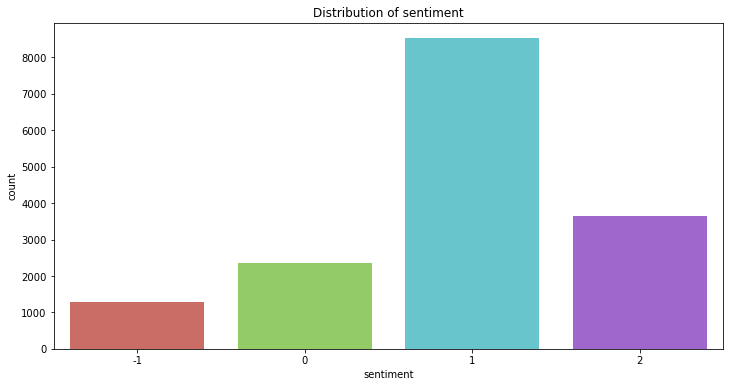

In [103]:
# A sentiment bar graph plot 
plt.figure (figsize= (12,6))
sns.countplot(x = 'sentiment', data = train, palette="hls")
plt.title("Distribution of sentiment");

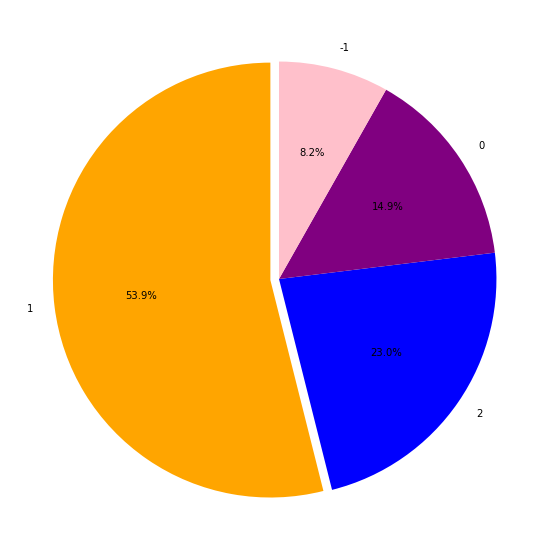

In [104]:
plt.figure (figsize= (16,10))
values = train['sentiment'].value_counts()/train.shape[0]
labels = (train['sentiment'].value_counts()/train.shape[0]).index
colors = ['orange', 'blue', 'purple', 'pink']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

### There is imbalanced classes in the dataset

Imbalanced classes put “accuracy” out of business. This is a surprisingly common problem in machine learning (specifically in classification), occurring in datasets with a disproportionate ratio of observations in each class.

Standard accuracy no longer reliably measures performance, which makes model training much trickier.

### How much class is imbalanced?
Two factors **balance_accuracy_score** and **accuracy_score are** to be considered to know how much the class is imbalanced.

balanced_accuracy_score computes balanced accuracy and it is used to deal with an imbalanced dataset for both binary or multiclass classification problems. It is defined as the average of recall obtained in each class.

Whereas the accuracy score is the accuracy classification score. The difference between these two accuracy scores will be zero for the balanced dataset. That is for a balanced dataset the balanced_accuracy_score becomes equivalent to the accuracy_score.
<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/imbalance.png?raw=true" width=90%/> 


In [105]:
# check for duplicated data
len(train[train.duplicated()])

0

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## Text Cleaning

Display some tweets that will help us understand what to do when we are trying to clean the messages that we have in the dataset.

In [106]:
for x in train['message'][30:150]:
    print(x)

@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice
RT @Honey17011: A guide to global warming, Paris pact and the US role #DemForce #TheResistance #UniteBlue https://t.co/RYiBLwAJZ4
RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…
Denying climate change ignores basic science
BGR ~ China practically says Trump lied about climate change https://t.co/Rz37HtcS8d
RT @BernieSanders: #ImVotingBecause the future of the planet is at stake. Hillary Clinton will combat climate change. Donald Trump thinks iÃ¢â‚¬Â¦
RT @Independent: Trump's team removed climate change data from the White House website. They may be breaking the law…
RT @DeboraheHart: Toxic soils, aquifers, vast amts of wasted (+ waste) water, runaway climate change - what part of gas fracking don'…
RT @BettyBowers: America: Where climate change is “unproven” to people 100% sure a guy called Noah fit all the w

From the tweets it can be seen that the messages have characters like <font color='red'>Emojis</font>, since <font color='red'>Emojis</font> are a new way to express something humans have known for a long time: symbols have power that goes beyond words. As we put it when we unveiled hearts on Twitter, “The heart… is a universal symbol that resonates across languages, cultures, and time zone..

### Rank of most frequent used words

In [114]:
# lets get the rank of most used words using a tokenizer from 'keras'
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['message'])
word_rank = tokenizer.word_index
word_rank

{'climate': 1,
 'change': 2,
 'https': 3,
 'rt': 4,
 't': 5,
 'co': 6,
 'the': 7,
 'to': 8,
 'is': 9,
 'of': 10,
 'a': 11,
 'in': 12,
 'global': 13,
 'warming': 14,
 'and': 15,
 'on': 16,
 'for': 17,
 'trump': 18,
 'about': 19,
 'that': 20,
 'we': 21,
 'you': 22,
 'are': 23,
 'it': 24,
 'i': 25,
 'how': 26,
 'believe': 27,
 'this': 28,
 'not': 29,
 'by': 30,
 'have': 31,
 'will': 32,
 'amp': 33,
 'with': 34,
 'be': 35,
 '…': 36,
 'from': 37,
 "doesn't": 38,
 'if': 39,
 'but': 40,
 'as': 41,
 'who': 42,
 'your': 43,
 'at': 44,
 'us': 45,
 'real': 46,
 'going': 47,
 'world': 48,
 "she's": 49,
 "it's": 50,
 'what': 51,
 'just': 52,
 'people': 53,
 'because': 54,
 'can': 55,
 'all': 56,
 'more': 57,
 'our': 58,
 'do': 59,
 'epa': 60,
 'president': 61,
 'new': 62,
 'has': 63,
 'via': 64,
 'so': 65,
 'no': 66,
 'an': 67,
 'now': 68,
 'like': 69,
 'fight': 70,
 'science': 71,
 "don't": 72,
 'says': 73,
 'die': 74,
 'he': 75,
 'was': 76,
 'scientists': 77,
 'why': 78,
 'they': 79,
 'up': 80,
 

In [115]:
# define Stemmer
ps = PorterStemmer()
# define lemmatiser
lemmatizer = WordNetLemmatizer()

### A function to clean our text column

In [116]:
def clean_tweet(message):
    clean_message = message.lower() # convert all text to lowercase
    
    # Replace or remove using a regular expression
    clean_message = re.sub(r'@\w+','',clean_message) # remove the username
    clean_message = re.sub(r'\$\S+','dollar',clean_message) # replace dollar amounts with dollar
    clean_message = re.sub(r'#','',clean_message) # remove '#' only
    # Removes RT, url and trailing white spaces
    clean_message = re.sub(r'^rt ','', re.sub(r'https://t.co/\w+', '', clean_message).strip())
    
    # remove emojis
    emojis = re.compile("["
                           u"\U0001F600-\U0001F64F"  # removes emoticons,
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    clean_message = emojis.sub(r'', clean_message)
    
    clean_message = re.sub(r'[^a-z0-9\s]','',clean_message) # remove punctuation
    clean_message = clean_message.split(' ') # split the text using a space character
    stop_words = set(stopwords.words('english')) # define stop words
    
    words = [] # define a new list to store words that are not in the 'stop_words'
    for word in clean_message:
        if word not in stop_words:
            words.append(word)
    #normalize text and prepare words and documents for further processing using Stemming and Lemmatization
    words = list(map(lambda x: ps.stem(x),words))
    lemmatized_string = ' '.join([lemmatizer.lemmatize(w) for w in words])
    
    return lemmatized_string

In [118]:
# testing the 'clean_tweet' function
clean_tweet('I hate it when my code is not running @thembani47 #angry #clean, text_data')

'hate code run  angri clean textdata'

In [119]:
# apply 'clean_tweet' on the 'message' column in the data frame
clean_text = train['message'].apply(clean_tweet)

In [120]:
clean_text.head()

0    polyscimajor epa chief doesnt think carbon dio...
1               like lack evid anthropogen global warm
2      research say three year act climat chang late  
3    todayinmak wire  2016 pivot year war climat chang
4     2016 racist sexist climat chang deni bigot le...
Name: message, dtype: object

### Create new feature

In [121]:
# add a new column to our dataset called 'clean message'
train['clean_message'] = clean_text

In [122]:
train.head()

,sentiment,message,tweetid,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesnt think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three ye...,698562,research say three year act climat chang late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmak wire 2016 pivot year war climat chang
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,2016 racist sexist climat chang deni bigot le...


### Convert text to numerical data

In [123]:
# Countvectorizer is a method to convert text to numerical data
corpus = train['clean_message']
vectorizer = CountVectorizer()
count_vectorized = vectorizer.fit_transform(corpus)

### Tokenize

In [124]:
'''
The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency 
weightings, and allow you to encode new documents. The scores are normalized to values 
between 0 and 1 and the encoded document vectors can then be used directly with most 
machine learning algorithms.
'''
data = train['clean_message']
vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
vectorized = vectorizer.fit_transform(data)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<img src="https://github.com/Classification-Team-CW5/Classification-Data/blob/main/scipy.jpeg?raw=true" width=40%/>
<font color='green'>scipy.sparse.hstack(blocks, format=None, dtype=None)</font>


Stack sparse matrices horizontally (column wise)

Parameters
blocks
sequence of sparse matrices with compatible shapes

formatstr
sparse format of the result (e.g., “csr”) by default an appropriate sparse matrix format is returned. This choice is subject to change.

dtypedtype, optional
The data-type of the output matrix. If not given, the dtype is determined from that of blocks.

In [125]:
# Using sparse to train the model using both representations.
# Defining the features as well as the label
X = scipy.sparse.hstack([vectorized, count_vectorized])
y = train['sentiment']

In [126]:
# Splitting the previously defined features and label of your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [127]:
# Creating a list of all the models to train
models = [
          LogisticRegression(random_state = 5),
          SVC(),
          MultinomialNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(max_depth=6),
          RandomForestClassifier()
         ]

In [128]:
# Fitting models onto the training data and predicting.
for model in range(0, len(models)):
    # define a pipeline to be nested and combined with other sklearn objects
    pipe = Pipeline([('clf', models[model])])

    # train the models
    pipe.fit(X_train, y_train)  
    predictions = pipe.predict(X_test)
    
    # display the results
    print(models[model])
    print(metrics.classification_report(y_test,predictions))
    print('F1_score: ',round(metrics.f1_score(y_test,predictions, average = 'weighted'),2))
    print('****\t****\t****\t****\t****\t****\t****\t****\t****\t****\t****\t****\t****')

C:\Users\F5469333\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)
              precision    recall  f1-score   support

          -1       0.68      0.45      0.54       278
           0       0.51      0.46      0.48       425
           1       0.77      0.83      0.80      1755
           2       0.74      0.74      0.74       706

    accuracy                           0.73      3164
   macro avg       0.68      0.62      0.64      3164
weighted avg       0.72      0.73      0.72      3164

F1_score:  0.72
****	****	****	****	****	****	****	****	****	****	****	****	****
SVC()
              precision    recall  f1-score   support

          -1       0.88      0.24      0.38       278
           0       0.66      0.33      0.44       425
           1       0.72      0.91      0.80      1755
           2       0.78      0.70      0.74       706

    accuracy                           0.73      3164
   macro avg       0.76      0.55      0.59      3164
weighted avg       0.74      0.73      0.70      3164

F1_score

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
https://medium.com/nerd-for-tech/class-imbalance-problem-and-ways-to-handle-it-4861a195398a

https://medium.com/geekculture/exploratory-data-analysis-eda-part-1-7eab49cdbd66#:~:text=EDA%20is%20very%20important%20step%20in%20machine%20learning,helps%20to%20improve%20the%20accuracy%20of%20the%20models.

In [ ]:
https://poopcode.com/how-to-remove-emoji-from-text-in-python/